<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Step2 : exploration
</font>
</h1>

in this step we want explore our data and answer some question

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the preprocessed dataset
df = pd.read_csv("preprocessed_sales.csv")
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530,United Kingdom


how many order is remain?

In [9]:
# calculate the number of remaining orders

number_of_orders = df["InvoiceNumber"].unique().shape[0]
number_of_orders

19213

this data set gathered in which period?

In [10]:
# calculate the period window

window_period = (df["InvoiceDate"].min() ,df["InvoiceDate"].max())
window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

using bar plot to show order count of week days

19213

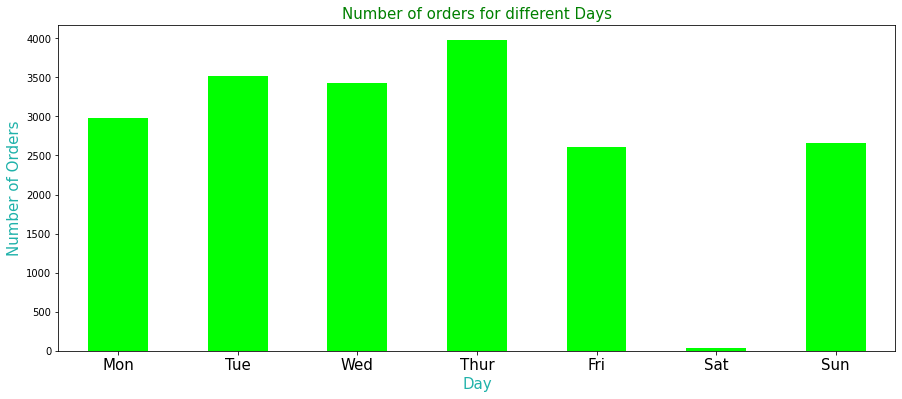

In [11]:
# plot the number of orders per week day
fig1 , ax1 = plt.subplots(figsize = (15,6))

order_time = pd.to_datetime(df.drop_duplicates("InvoiceNumber")["InvoiceDate"])

order_time= order_time.dt.day_name().value_counts().reindex(["Monday", "Tuesday", "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday"])

order_time.plot(kind="bar" , ax=ax1 , color="lime")
ax1.set_xlabel("Day" , color="lightseagreen" , fontsize=15)
ax1.set_ylabel("Number of Orders" , color="lightseagreen" , fontsize=15)
ax1.set_title("Number of orders for different Days" , color="green" , fontsize=15)
ax1.set_xticklabels(["Mon", "Tue", "Wed" , "Thur" , "Fri" , "Sat" , "Sun"],rotation=0,fontsize=15)
order_time.sum()



using bar blot to show total sale of each month

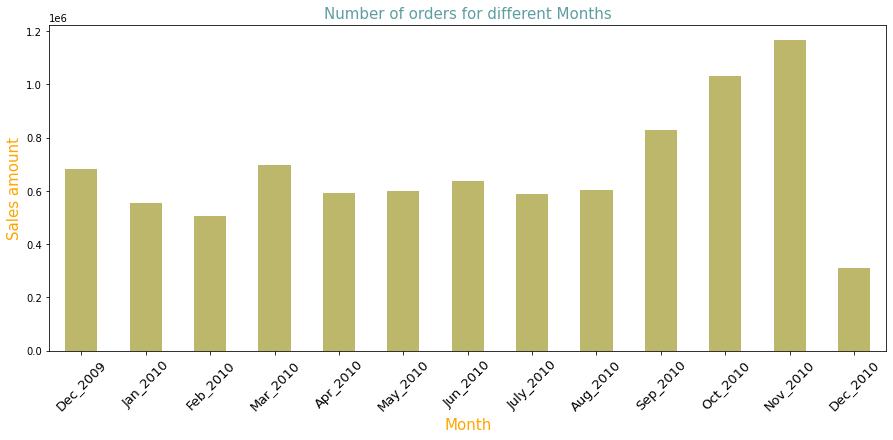

In [13]:
tmp_df = df.copy()
fig2 , ax2 = plt.subplots(figsize=(15,6))

month_list=pd.to_datetime(df["InvoiceDate"]).dt.month
year_list =pd.to_datetime(df["InvoiceDate"]).dt.year
tmp_df["month-year"]= ((year_list*100)+month_list)
tmp_df["totalPrice"]=tmp_df["UnitPrice"]*tmp_df["Quantity"]
tmp_df.groupby("month-year")["totalPrice"].sum().sort_index().plot(kind="bar" , ax=ax2  , color="darkkhaki")
ax2.set_xlabel("Month" , color="orange" , fontsize=15)
ax2.set_ylabel("Sales amount" , color="orange" , fontsize=15)
ax2.set_title("Number of orders for different Months", color="cadetblue", fontsize=15)
ax2.set_xticklabels(["Dec_2009" , "Jan_2010" , "Feb_2010" , "Mar_2010" , "Apr_2010" , "May_2010" , "Jun_2010" , "July_2010","Aug_2010" , "Sep_2010" , "Oct_2010" , "Nov_2010","Dec_2010"] , rotation=45,fontsize=13);
